# Machine Learning: Generalization, Model Selection and Beyond Linearity

# Instructions

This study explores model selection using K-fold cross validation and methods for selecting hyperparameters to enhance model generalizability.

The analysis is structured into three parts:

1. **Part One**: Generalization
2. **Part Two**: Model Selection
3. **Part Three**: Beyond Linearity

To ensure you understand how each package is used, libraries will be imported as and when needed. The libraries used are all open source, and if you do not have any of these libraries installed, you can install them using the `pip install` method, either via your terminal or within a code cell in this notebook. For example, in your code cell you can use:

`!pip install matplotlib`

# Part One: Generalization 


We will make use of the "make classification" from sklearn datasets

In [169]:
import warnings
warnings.filterwarnings('ignore')

### Make Classification Datasets and Plot

In [170]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_circles
X, y = make_circles(n_samples=1000,factor=.25, noise=.30)

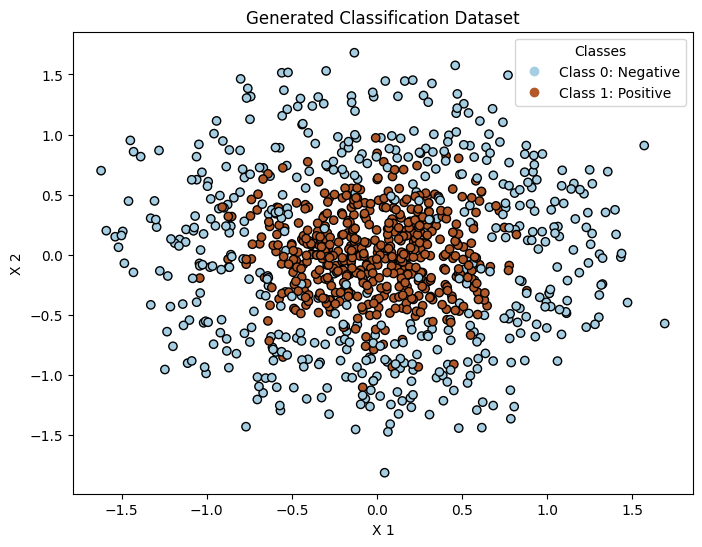

In [171]:
def plot_dataset(X, y, title="Dataset"):
    """
    Plots the dataset with different colors for each class and adds a legend.
    
    Parameters:
    X (array-like): Feature matrix.
    y (array-like): Target vector.
    title (str): Title of the plot.
    """
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.title(title)
    plt.xlabel("X 1")
    plt.ylabel("X 2")
    
    # Create a legend
    handles, labels = scatter.legend_elements()
    legend_labels = ['Class 0: Negative', 'Class 1: Positive']
    plt.legend(handles, legend_labels, title="Classes")
    
    plt.show()
plot_dataset(X, y, title="Generated Classification Dataset")

### Kfold Cross validation:



The kfold cross-validation metric is calculated as:

$$
CV_k = \frac{1}{k} \sum_{i=1}^{k} \text{Metric}_i
$$

The metrics we would use will be accuracy and the f1 score. We will use the inbuilt libraries for these metrics directly from sklearn.



In [172]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score

def kfold_cross_validation(model, X, y, k=5, random_seed=0):
    """
    K-Fold cross-validation for a selected model.

    Parameters:
    model: The model you want to evaluate.
    X: The input features (numpy array or pandas DataFrame).
    y: The target variable (numpy array or pandas Series).
    k: Number of folds (default is 5).

    Returns: 
    Average metrics across the K folds.
    """
    np.random.seed(random_seed)
    n_samples = len(X)
    # Get the fold size by dividing the number of samples by k
    fold_size = n_samples // k Ensure integer division
    
    indices = np.arange(n_samples)
    np.random.shuffle(indices)  # Shuffle indices for random sampling

    # Initialize lists to store accuracies and f1_scores
    accuracies = [] Accuracy list
    f1_scores =[] F1 score list

    for i in range(k):
        # Select the test and train indices
        test_indices =  indices[i * fold_size : (i + 1) * fold_size] Define test indices
        train_indices = np.concatenate([indices[:i * fold_size], indices[(i + 1) * fold_size:]]) Define train indices

        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices] Model fitting on train Use model to make Predictions on held out xtest
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred) Calculate accuracy and append to accuracies list
        f1 =  f1_score(y_test, y_pred, average='weighted') Calculate weighted F1 score and append to f1_scores list
        accuracies.append(accuracy)
        f1_scores.append(f1)

    return np.mean(accuracies),np.mean(f1_scores) Return average accuracy and F1 score
   
    

### Model Fitting


#### Analysis 


In [173]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis



# Instantiate your models
logistic_regression = LogisticRegression() lda = LinearDiscriminantAnalysis() qda = QuadraticDiscriminantAnalysis() # Fit the models using k-fold cross-validation
lr_accuracy, lr_f1 = kfold_cross_validation(logistic_regression, X, y) lda_accuracy, lda_f1 = kfold_cross_validation(lda, X, y) qda_accuracy, qda_f1 = kfold_cross_validation(qda, X, y) print(f'Logistic Regression: Accuracy = {lr_accuracy:.2f}, F1 Score = {lr_f1:.2f}')
print(f'LDA: Accuracy = {lda_accuracy:.2f}, F1 Score = {lda_f1:.2f}')
print(f'QDA: Accuracy = {qda_accuracy:.2f}, F1 Score = {qda_f1:.2f}')

Logistic Regression: Accuracy = 0.47, F1 Score = 0.41
LDA: Accuracy = 0.46, F1 Score = 0.41
QDA: Accuracy = 0.87, F1 Score = 0.87


### Evaluating Model Performance with Varying K



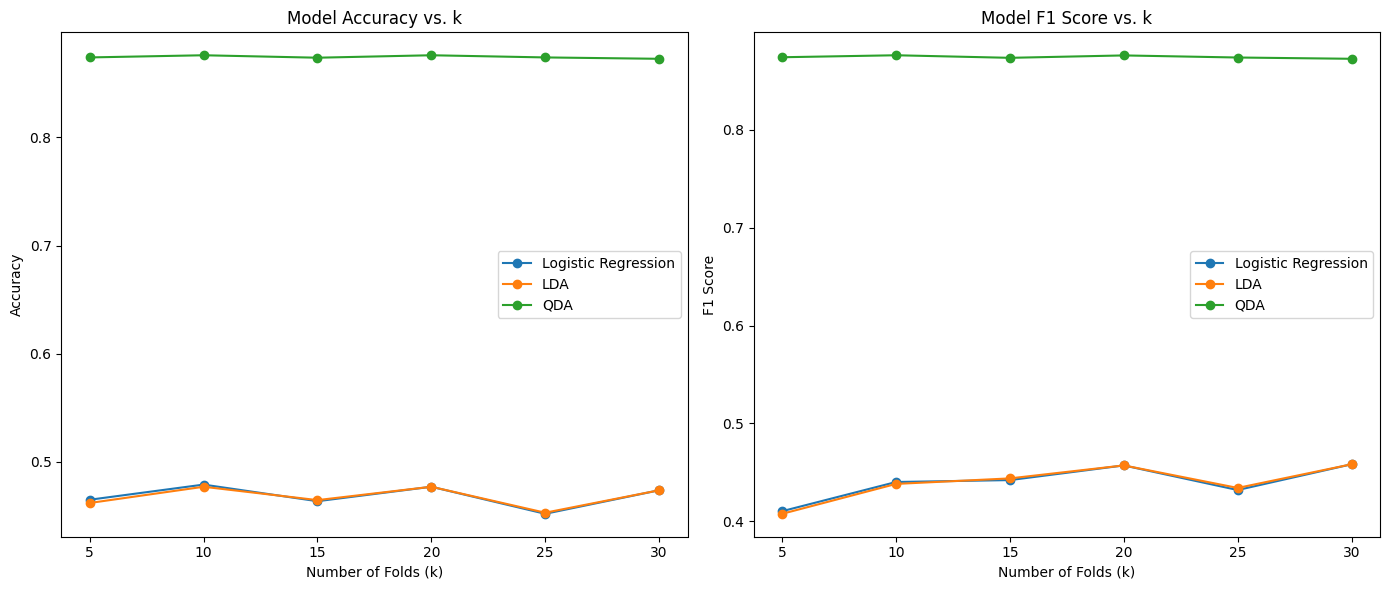

In [174]:
# Define the range of k values
k_values = [5, 10, 15, 20, 25, 30] Initialize lists to store accuracy and f1 score of each model
lr_accuracies = []
lr_f1_scores = []
lda_accuracies = []
lda_f1_scores = []
qda_accuracies = []
qda_f1_scores = []
# Perform cross-validation for each value of k
for k in k_values:
    lr_accuracy, lr_f1 = kfold_cross_validation(logistic_regression, X, y,k=k) Use written kfold_cross_validation  for the logistic regression model
    lda_accuracy, lda_f1 = kfold_cross_validation(lda, X, y,k=k) Use written kfold_cross_validation  for the lda model
    qda_accuracy, qda_f1 = kfold_cross_validation(qda, X, y,k=k) Use written kfold_cross_validation  for the qda model


    lr_accuracies.append(lr_accuracy)
    lr_f1_scores.append(lr_f1)
    lda_accuracies.append(lda_accuracy)
    lda_f1_scores.append(lda_f1)
    qda_accuracies.append(qda_accuracy)
    qda_f1_scores.append(qda_f1)

# Plot the results
plt.figure(figsize=(14, 6))

# accuracy plot
plt.subplot(1, 2, 1) Plot the accuracy of each model
plt.plot(k_values, lr_accuracies, label='Logistic Regression', marker='o')
plt.plot(k_values, lda_accuracies, label='LDA', marker='o')
plt.plot(k_values, qda_accuracies, label='QDA', marker='o')
plt.xlabel('Number of Folds (k)')
plt.ylabel('Accuracy')
plt.title('Model Accuracy vs. k')
plt.legend()

# F1 score plot
plt.subplot(1, 2, 2) Plot the F1 score of each model
plt.plot(k_values, lr_f1_scores, label='Logistic Regression', marker='o')
plt.plot(k_values, lda_f1_scores, label='LDA', marker='o')
plt.plot(k_values, qda_f1_scores, label='QDA', marker='o')
plt.xlabel('Number of Folds (k)')
plt.ylabel('F1 Score')
plt.title('Model F1 Score vs. k')
plt.legend()

plt.tight_layout()
plt.show()

### Decision Boundary Calculation



#### Analysis

<span style="color:cyan">
The decision boundary for Logistic Regression and LDA is linear, making them suitable only for linearly separable data, but they fail to capture the complexity of non-linear patterns in this dataset. In contrast, QDA has a quadratic decision boundary, allowing it to adapt to the non-linear structure of the data and better separate the two classes. This explains QDA's superior performance in handling complex, non-linear distributions compared to the other models.
</span>


In [175]:
def plot_decision_boundary(model, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    ax.set_title(title)

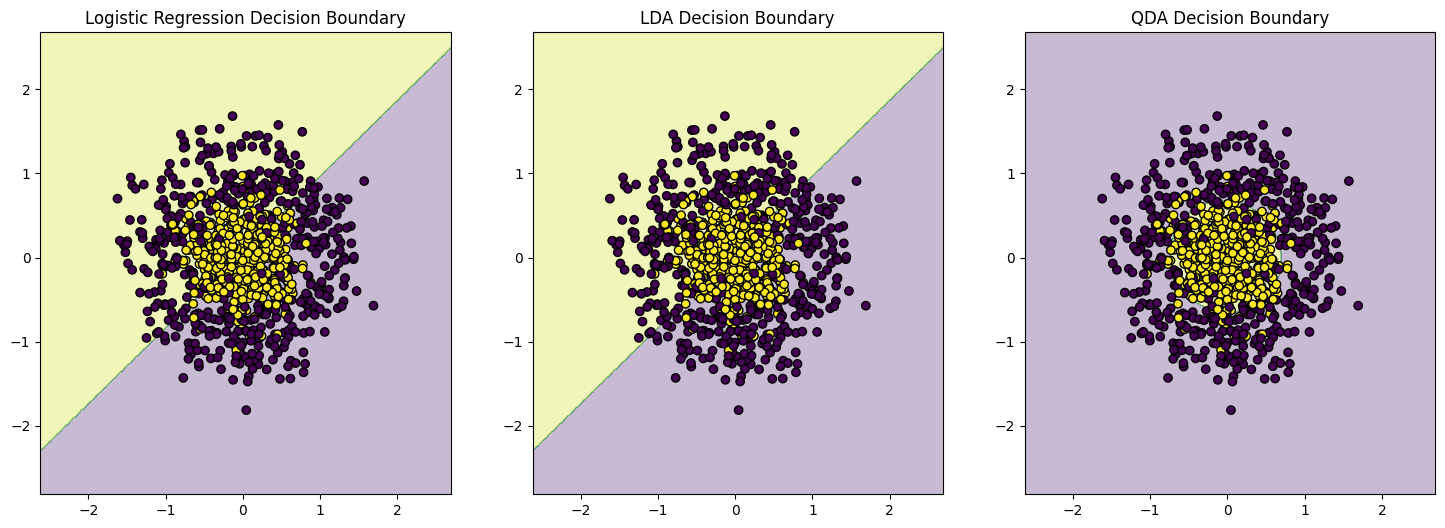

In [176]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
plot_decision_boundary(logistic_regression, X, y, axes[0], "Logistic Regression Decision Boundary")
plot_decision_boundary(lda, X, y, axes[1], "LDA Decision Boundary")
plot_decision_boundary(qda, X, y, axes[2], "QDA Decision Boundary")
plt.show()

# Part Two: Model Selection 

In this section, we will:

* Fit Lasso and Ridge regression models.
* How to select the optimal $\lambda$ for each model.
* Compare the performance of the two models using the optimal $\lambda$ values.

In [177]:
import matplotlib.pyplot as plt

def plot_regression_dataset(X, y, title="Regression Dataset"):
    """
    Plots the regression dataset with a color gradient representing the target values.
    Parameters:
    X (array-like): Feature matrix.
    y (array-like): Target vector.
    title (str): Title of the plot.
    """
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
    plt.colorbar(label='Target Value')
    plt.title(title)
    plt.xlabel("X 1")
    plt.ylabel("X 2")
    
    plt.show()

### Datasets

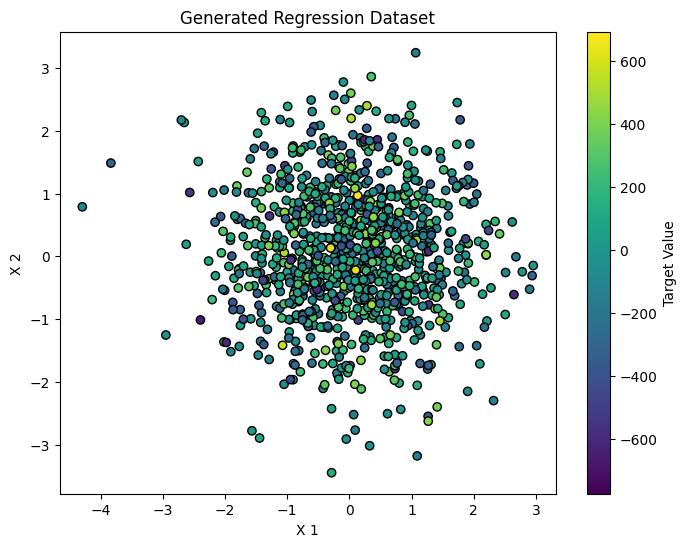

In [178]:
from sklearn.datasets import make_regression

X_regression, y_regression = make_regression(n_samples=1000, n_features=50, n_informative=15, noise=0.35, random_state=42)
plot_regression_dataset(X_regression, y_regression, title="Generated Regression Dataset")

### Lasso & Ridge Regression






#### Analysis 

<Figure size 1000x600 with 0 Axes>

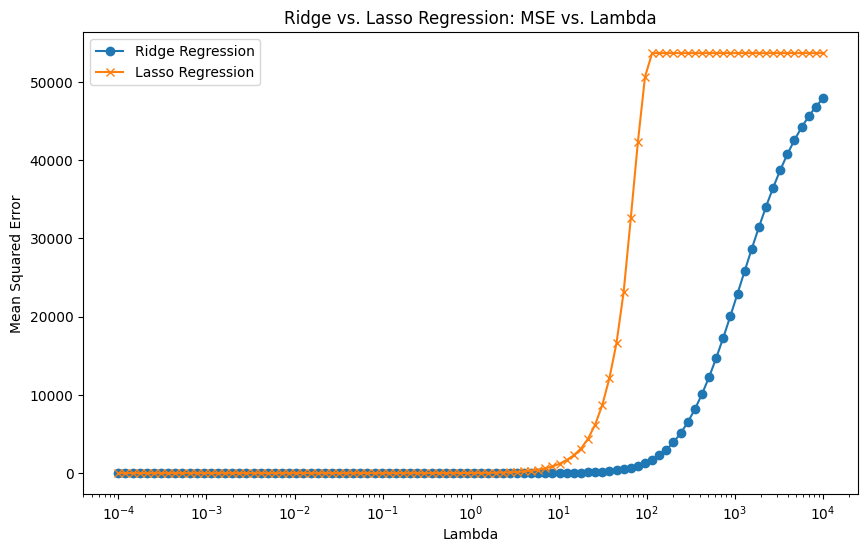

Optimal Lambda for Ridge Regression: 0.007
Optimal Lambda for Lasso Regression: 0.013


In [179]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score


X_train, X_test, y_train, y_test = train_test_split(X_regression, y_regression, test_size=0.3, random_state=42)

# Define a range of lambda values
lambda_values = np.logspace(-4, 4, 100)
mse_ridge = []
mse_lasso = []

# Define K-Fold cross-validation - NOTE we using the inbuilt KFold here
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform K-Fold Cross-Validation for Ridge Regression
for lambda_val in lambda_values: Fit a Ridge regression model with the current lambda value
    mse_scores = cross_val_score(Ridge(alpha=lambda_val),X_train,y_train,cv=kf,scoring="neg_mean_squared_error") Use cross_val_score with 'neg_mean_squared_error'
    mse_ridge.append(-mse_scores.mean())  # Negate to get positive MSE

# Perform K-Fold Cross-Validation for Lasso Regression
for lambda_val in lambda_values: Fit a Lasso regression model with the current lambda value
    mse_scores = cross_val_score(Lasso(alpha=lambda_val),X_train, y_train, cv=kf, scoring='neg_mean_squared_error') Use cross_val_score with 'neg_mean_squared_error'
    mse_lasso.append(-mse_scores.mean())  # Negate to get positive MSE

# Plot MSE vs. Lambda for Ridge and Lasso Regression
plt.figure(figsize=(10, 6))
plt.figure(figsize=(10, 6)) Plot the MSE for Ridge Regression (lambda values vs. mse_ridge)
plt.plot(lambda_values, mse_ridge, label='Ridge Regression', marker='o') Plot the MSE for Lasso Regression (lambda values vs. mse_lasso)
plt.plot(lambda_values, mse_lasso, label='Lasso Regression', marker='x')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Mean Squared Error')
plt.title('Ridge vs. Lasso Regression: MSE vs. Lambda')
plt.legend()
plt.show()

# Choose the optimal lambda for each model
optimal_lambda_ridge =  lambda_values[np.argmin(mse_ridge)] Select the best lambda value for Ridge
optimal_lambda_lasso =  lambda_values[np.argmin(mse_lasso)] Select the best lambda value for Lasso
print(f'Optimal Lambda for Ridge Regression: {optimal_lambda_ridge:.3f}')
print(f'Optimal Lambda for Lasso Regression: {optimal_lambda_lasso:.3f}')




Using the optimal lambda values obtained from cross-validation for both Ridge and Lasso regression, follow these steps:

* Fit the Ridge and Lasso regression on your train data using the selected optimal lambda values.
* Evaluate the performance of the models on the testing set.
* Between the two models, which will you choose and why?

<span style="color:cyan">
Based on the results, Lasso regression with a lambda value of 0.013 is preferred, as it achieves a lower Mean Squared Error (MSE) of 0.117 compared to Ridge regression, which has an MSE of 0.122 with a lambda value of 0.007. Additionally, Lasso offers the advantage of feature selection by reducing some coefficients to zero, which can improve model interpretability and reduce overfitting.
</span>


#### Analysis 


In [180]:
from sklearn.metrics import mean_squared_error Fit Ridge Regression on train data with optimal lambda
ridge = Ridge(alpha=optimal_lambda_ridge)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
mse_ridge =mean_squared_error(y_test, y_pred_ridge) estimate the MSE Fit Lasso Regression train data with optimal lambda
lasso = Lasso(alpha=optimal_lambda_lasso)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
mse_lasso =mean_squared_error(y_test, y_pred_lasso) estimate the MSE

print(f"Lasso regression with lambda {optimal_lambda_lasso:.3f} has mse {mse_lasso:.3f} and ridge regression using lambda {optimal_lambda_ridge:.3f} has mse {mse_ridge:.3f}")

Lasso regression with lambda 0.013 has mse 0.117 and ridge regression using lambda 0.007 has mse 0.122


# Part Three: Beyond Linearity 


### Generate Datasets

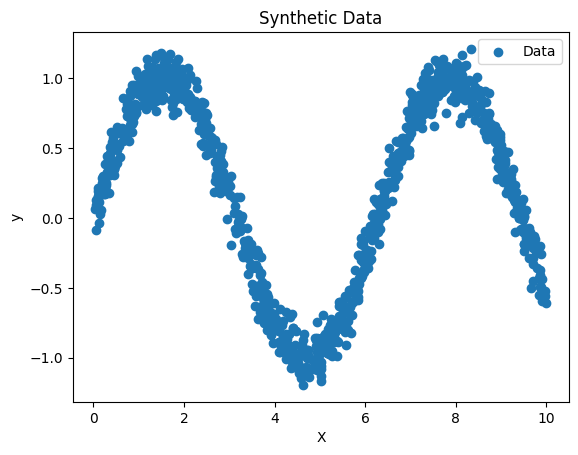

In [181]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
num_samples = 1000
X_splines = np.sort(np.random.rand(num_samples) * 10)
y_splines = np.sin(X_splines) + np.random.randn(num_samples) * 0.1

# Plot the synthetic data
plt.scatter(X_splines, y_splines, label='Data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Synthetic Data')
plt.legend()
plt.show()


### Exploring Degrees Polynomial Regression


 #### Analysis 

<span style="color:cyan">
Based on the results, Degree 6 is the best choice for polynomial regression as it achieves the lowest MSE (0.011) and accurately fits the data, capturing the sine wave's periodicity and details without overfitting. While Degree 5 also performs well (MSE = 0.036), Degree 6 provides a more precise fit, especially near the peaks and valleys, making it the most suitable for this dataset.
</span>


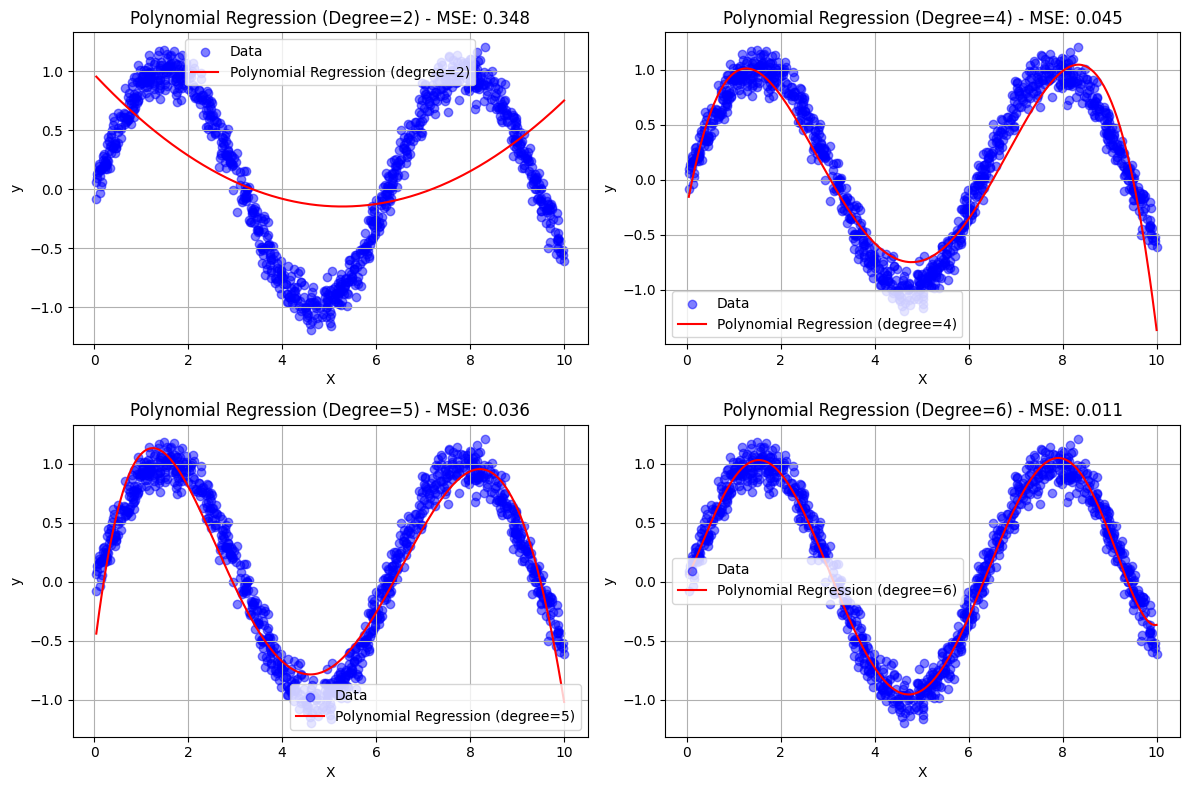

In [182]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

plt.figure(figsize=(12, 8))
degrees_range = [2, 4, 5, 6]

# Loop through different polynomial degrees
for j, degree in enumerate(degrees_range):
    poly_features = PolynomialFeatures(degree=degree) Create polynomial transformer Transform the features to polynomial features
    X_poly =  poly_features.fit_transform(X_splines.reshape(-1, 1)) Fit the polynomial regression model
    poly_model = LinearRegression()
    poly_model.fit(X_poly, y_splines)
    # Predict the output
    y_poly_pred = poly_model.predict(X_poly)

    # Calculate the MSE for polynomial regression
    mse_poly = mean_squared_error(y_splines, y_poly_pred)

    # Plot the polynomial regression
    plt.subplot(2, 2, j + 1)  # 2 rows, 2 columns
    plt.scatter(X_splines, y_splines, label='Data', color='blue', alpha=0.5)
    plt.plot(X_splines, y_poly_pred, label=f'Polynomial Regression (degree={degree})', color='red')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(f'Polynomial Regression (Degree={degree}) - MSE: {mse_poly:.3f}')
    plt.legend()
    plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


### Exploring Degrees and Knots on Spline Regression

* What observations can you make regarding the effect of varying knots?
* Which specific combination of knots and degrees would you select?

#### Analysis 

<span style="color:cyan">
When the number of knots is small, like Knots=2, the model is not flexible enough. It cannot capture all the details in the data, especially the peaks and valleys, and this gives a higher MSE (0.0097 for Knots=2, Degree=10). But when the number of knots is more, like Knots=10, the model becomes better at fitting the data because it can handle more changes in the pattern. This gives a lower MSE (0.0096 for Knots=10, Degree=10). For the degree, if it is low, like Degree=2, the model is simple and misses the complex patterns, which increases the MSE a little (0.0097 for Knots=10, Degree=2). But a high degree, like Degree=10, helps the model capture the patterns better, especially with more knots.

The best combination is Knots=10 and Degree=10 because it has the lowest MSE (0.0096) and fits the data really well. This combination is more flexible and accurate than the others. Knots=10 and Degree=2 is a simpler choice, but it’s not as accurate, and Knots=2 and Degree=10 does not have enough knots to fit the data properly. So, Knots=10 and Degree=10 is the best for this dataset.
</span>



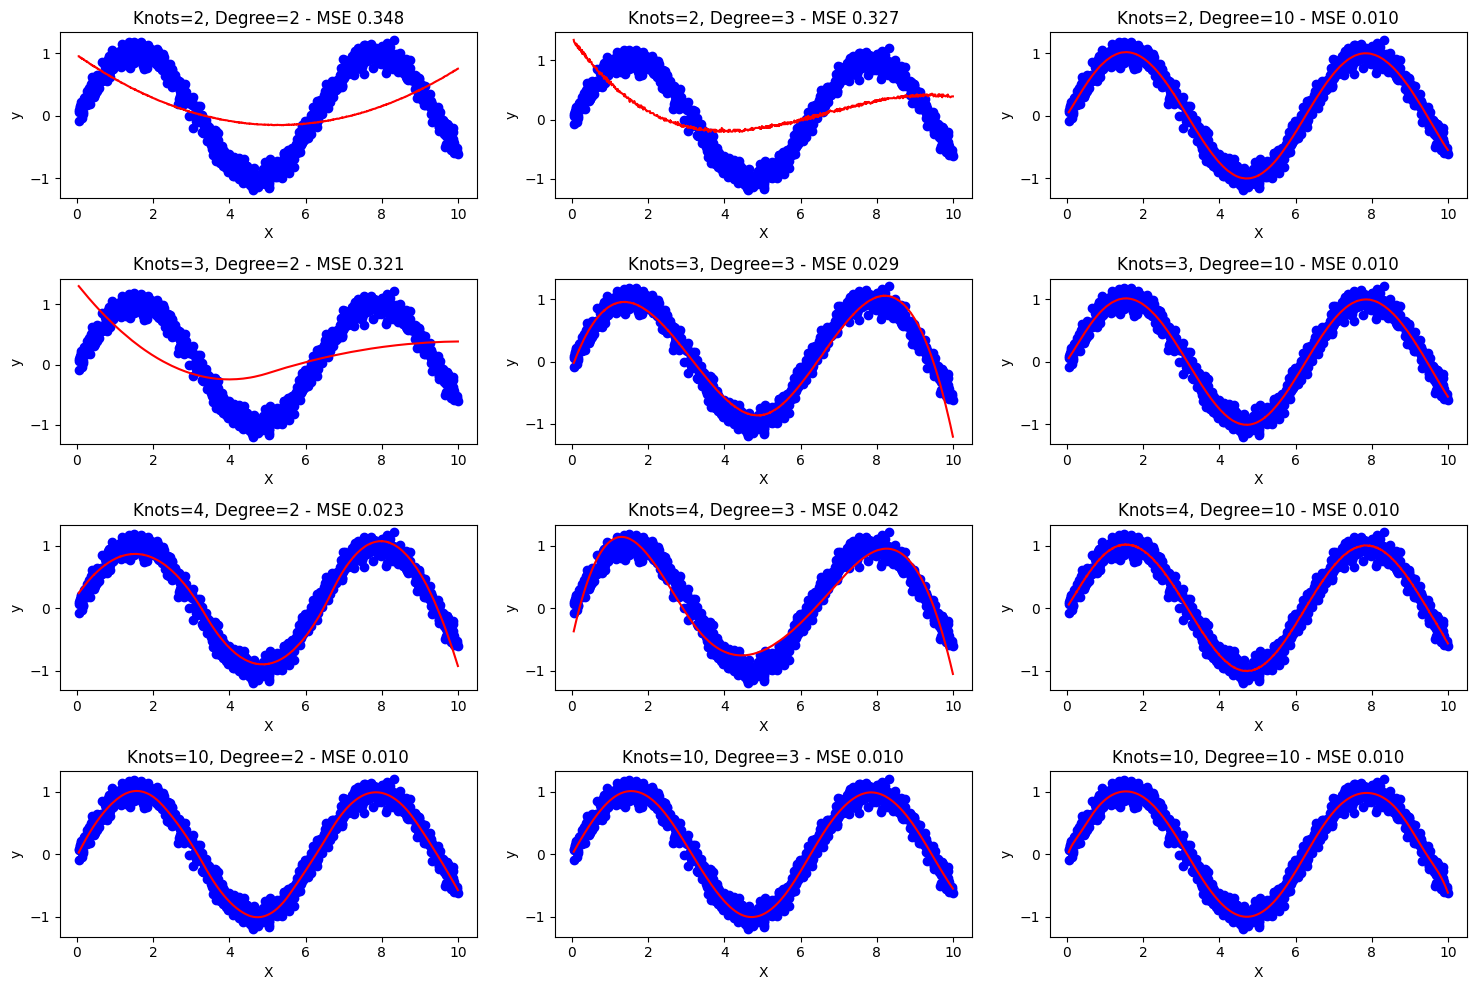

In [183]:
from sklearn.preprocessing import SplineTransformer
from sklearn.pipeline import make_pipeline

plt.figure(figsize=(15, 10))
knots_range = [2, 3, 4, 10]
degrees_range = [2, 3, 10]
#
# knots_range = [2,3,4,5,6,7,8,9,10]
# degrees_range = [1,2, 3, 4, 5, 6, 7, 8, 9, 10]

results = []
# Loop through different numbers of knots and degrees
for i, n_knots in enumerate(knots_range):
    for j, degree in enumerate(degrees_range): Create a spline transformer
        spline_transformer = SplineTransformer(n_knots=n_knots, degree=degree) Create linear regression pipeline
        spline_model = make_pipeline(spline_transformer, LinearRegression()) Fit the spline regression model
        spline_model.fit(X_splines.reshape(-1, 1), y_splines)

        y_spline_pred = spline_model.predict(X_splines.reshape(-1, 1))
        mse_spline = mean_squared_error(y_splines, y_spline_pred) Append knots, degree, and mse to results
        results.append([n_knots, degree, mse_spline])

        plt.subplot(len(knots_range), len(degrees_range), i * len(degrees_range) + (j + 1))
        plt.scatter(X_splines, y_splines, label='Data', color='blue')
        plt.plot(X_splines, y_spline_pred, label=f'Spline (knots={n_knots}, degree={degree})', color='red')
        
        plt.xlabel('X')
        plt.ylabel('y')
        plt.title(f'Knots={n_knots}, Degree={degree} - MSE {mse_spline:.3f}')

plt.tight_layout()
plt.show()

In [184]:
for k,v,p in sorted(results,key=lambda x:x[2]):
    print(k,v,p)

10 10 0.00961496995358138
10 3 0.009666244792873403
3 10 0.009678644915243673
2 10 0.00968382830353556
4 10 0.0096991395569628
10 2 0.009717679446206981
4 2 0.02349642917266089
3 3 0.02931122772031551
4 3 0.041516611298551366
3 2 0.3209572942900501
2 3 0.32674017202946226
2 2 0.34757320327410274


<p style="text-align: center;">


# Summary

This analysis demonstrates practical machine learning techniques for model selection, generalization, and working with non-linear models.
</p>